# Review and Refresher II

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-11-12

In [3]:
import numpy as np

# Basic reshape: changing dimensions while keeping same total elements
x = np.array([1, 2, 3, 4])
print("Original array:", x.shape)  # (4,)

# Reshape to 2x2
x_2d = x.reshape(2, 2)
print("\nReshaped to 2x2:\n", x_2d)  # shape: (2, 2)

# Using -1: automatically calculate the dimension
x = np.array([1, 2, 3, 4, 5, 6])
print("\nOriginal array:", x.shape)  # (6,)

# Reshape to 2x3
x_2d = x.reshape(2, -1)  # -1 means "figure out this dimension"
print("\nReshaped to 2x3:\n", x_2d)  # shape: (2, 3)

# Common use case: adding a dimension for ML models
x = np.array([1, 2, 3])
print("\nOriginal array:", x.shape)  # (3,)

# Add dimension to make it 2D
x_2d = x.reshape(1, -1)  # Makes it (1, 3)
print("\nAdded dimension:", x_2d.shape)
print(x_2d)

# Or add dimension at the end
x_2d = x.reshape(-1, 1)  # Makes it (3, 1)
print("\nAdded dimension at end:", x_2d.shape)
print(x_2d)

Original array: (4,)

Reshaped to 2x2:
 [[1 2]
 [3 4]]

Original array: (6,)

Reshaped to 2x3:
 [[1 2 3]
 [4 5 6]]

Original array: (3,)

Added dimension: (1, 3)
[[1 2 3]]

Added dimension at end: (3, 1)
[[1]
 [2]
 [3]]


**Abstract**: In this review and refresher notebook we remind ourselves
about linear models and use the opportunity to provide some review of
linear algebra. Most of the code you need is provided in the notebook,
there are a few exercises to help develop your understanding.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

# Introduction

Welcome to the review and refresh practical. This work is for you to
remind yourself about the ways of using the notebook. You will have a
chance to ask us questions about the content on 9th of November. Within
the material you will find exercises. If you are confident with
probability you can likely ignore the reading and exercises which are
listed from Rogers and Girolami (2011) and Bishop (2006). There should
be *no need* to purchase these books for this course. The suggestions of
sections are there just as a reminder.

We suggest you run these labs in *Google colab*, there’s a link to doing
that on the main lab page at the top. We also suggest that the first
thing you do is click `View`-\>`Expand sections` to make all parts of
the lab visibile.

We suggest you complete at least Exercises 2-5.

## Setup

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used below.

The software can be installed using

In [2]:
%pip install notutils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [3]:
import notutils

## pods

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/pods-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/pods-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In Sheffield we created a suite of software tools for ‘Open Data
Science’. Open data science is an approach to sharing code, models and
data that should make it easier for companies, health professionals and
scientists to gain access to data science techniques.

You can also check this blog post on [Open Data
Science](http://inverseprobability.com/2014/07/01/open-data-science).

The software can be installed using

In [4]:
%pip install pods

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/ods>

Once `pods` is installed, it can be imported in the usual manner.

In [5]:
import pods

## mlai

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [ ]:
%pip install mlai

from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [7]:
import mlai
from mlai import plot

## Review

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/review-and-refresher-II.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/review-and-refresher-II.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

-   Last time: Looked at objective functions for movie recommendation.
-   Minimized sum of squares objective by steepest descent and
    stochastic gradients.
-   This time: explore least squares for regression.

## Regression Examples

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-examples.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-examples.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Regression involves predicting a real value, $y_i$, given an input
vector, $\mathbf{ x}_i$. For example, the Tecator data involves
predicting the quality of meat given spectral measurements. Or in
radiocarbon dating, the C14 calibration curve maps from radiocarbon age
to age measured through a back-trace of tree rings. Regression has also
been used to predict the quality of board game moves given expert rated
training data.

## Olympic 100m Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-100m-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-100m-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="50%">

-   Gold medal times for Olympic 100 m runners since 1896.
-   One of a number of Olypmic data sets collected by Rogers and
    Girolami (2011). `{=html}     </td>` `{=html}     <td width="50%">`

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//ml/100m_final_start.jpg" style="width:100%">

Figure: <i>Start of the 2012 London 100m race. *Image from Wikimedia
Commons* <http://bit.ly/191adDC></i>

</td>
</tr>
</table>

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal 100m
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [8]:
import numpy as np
import pods

In [11]:
data = pods.datasets.olympic_100m_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

Acquiring resource: rogers_girolami_data

Details of data: 
Data from the textbook 'A First Course in Machine Learning'. Available from http://www.dcs.gla.ac.uk/~srogers/firstcourseml/.

Please cite:
A First Course in Machine Learning. Simon Rogers and Mark Girolami: Chapman & Hall/CRC, ISBN-13: 978-1439824146

After downloading the data will take up 21949154 bytes of space.

Data will be stored in C:\Users\peiya/ods_data_cache/rogers_girolami_data.

Do you wish to proceed with the download? [yes/no]


ValueError: Tried url http://www.dcs.gla.ac.uk/~srogers/firstcourseml/firstcoursemldata.tar.gz?dl=1 and received client error 404

In [12]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
import pods
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:

xlim = (1875,2030)
ylim = (9, 12)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='olympic-100m.svg',
                  directory='./datasets')

<img src="https://mlatcl.github.io/advds/./slides/diagrams//datasets/olympic-100m.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic 100m wining times since 1896.</i>

## Olympic Marathon Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardized distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organized leading to very slow times.

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//Stephen_Kiprotich.jpg" style="width:100%">
<small>Image from Wikimedia Commons <http://bit.ly/16kMKHQ></small>

</td>
</tr>
</table>

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. Let’s load in the data
and plot.

In [ ]:
import numpy as np
import pods

In [13]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in C:\Users\peiya/ods_data_cache/olympic_marathon_men.

Do you wish to proceed with the download? [yes/no]
|    Downloading   0.001MB     |
|>|


In [14]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

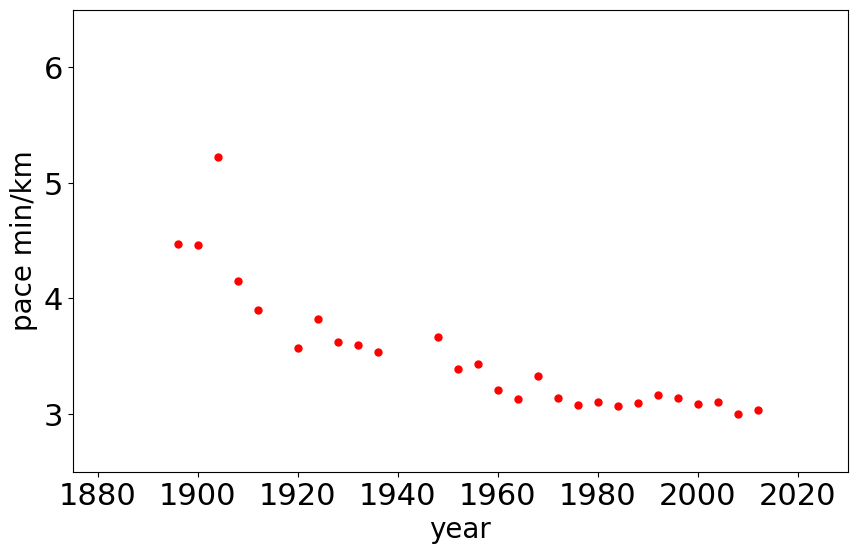

In [15]:

xlim = (1875,2030)
ylim = (2.5, 6.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='olympic-marathon.svg',
                  directory='./datasets')

<img src="https://mlatcl.github.io/advds/./slides/diagrams//datasets/olympic-marathon.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1896.</i>

Things to notice about the data include the outlier in 1904, in that
year the Olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed. More
recent years see more consistently quick marathons.

# What is Machine Learning?

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/what-is-ml.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/what-is-ml.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

What is machine learning? At its most basic level machine learning is a
combination of

$$\text{data} + \text{model} \stackrel{\text{compute}}{\rightarrow} \text{prediction}$$

where *data* is our observations. They can be actively or passively
acquired (meta-data). The *model* contains our assumptions, based on
previous experience. That experience can be other data, it can come from
transfer learning, or it can merely be our beliefs about the
regularities of the universe. In humans our models include our inductive
biases. The *prediction* is an action to be taken or a categorization or
a quality score. The reason that machine learning has become a mainstay
of artificial intelligence is the importance of predictions in
artificial intelligence. The data and the model are combined through
computation.

In practice we normally perform machine learning using two functions. To
combine data with a model we typically make use of:

**a prediction function** it is used to make the predictions. It
includes our beliefs about the regularities of the universe, our
assumptions about how the world works, e.g., smoothness, spatial
similarities, temporal similarities.

**an objective function** it defines the ‘cost’ of misprediction.
Typically, it includes knowledge about the world’s generating processes
(probabilistic objectives) or the costs we pay for mispredictions
(empirical risk minimization).

The combination of data and model through the prediction function and
the objective function leads to a *learning algorithm*. The class of
prediction functions and objective functions we can make use of is
restricted by the algorithms they lead to. If the prediction function or
the objective function are too complex, then it can be difficult to find
an appropriate learning algorithm. Much of the academic field of machine
learning is the quest for new learning algorithms that allow us to bring
different types of models and data together.

A useful reference for state of the art in machine learning is the UK
Royal Society Report, [Machine Learning: Power and Promise of Computers
that Learn by
Example](https://royalsociety.org/~/media/policy/projects/machine-learning/publications/machine-learning-report.pdf).

You can also check my post blog post on [What is Machine
Learning?](http://inverseprobability.com/2017/07/17/what-is-machine-learning).

# Sum of Squares Error

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/sum-of-squares-error.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/sum-of-squares-error.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Last week we considered a cost function for minimization of the error.
We considered items (films) and users and assumed that each movie
rating, $y_{i,j}$ could be summarised by an inner product between a
vector associated with the item, $\mathbf{v}_j$ and one associated with
the user $\mathbf{u}_i$. We justified the inner product as a measure of
similarity in the space of ‘movie subjects’, where both the users and
the items lived, giving the analogy of a library.

To make predictions we encouraged the similarity to be high if the movie
rating was high using the quadratic error function, $$
E_{i,j}(\mathbf{u}_i, \mathbf{v}_j) = \left(\mathbf{u}_i^\top \mathbf{v}_j -
y_{i,j}\right)^2,
$$ which we then summed across all the observations to form the total
error $$
E(\mathbf{U}, \mathbf{V}) =
\sum_{i,j}s_{i,j}\left(\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j}\right)^2,
$$ where $s_{i,j}$ is an indicator variable which is set to 1 if the
rating of movie $j$ by user $i$ is provided in our data set. This is
known as a sum of squares error.

This week we will reinterpret the error as a *probabilistic model*. We
will consider the difference between our data and our model to have come
from unconsidered factors which exhibit as a probability density. This
leads to a more principled definition of least squares error that is
originally due to [Carl Friederich
Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss), but is
mainly inspired by the thinking of [Pierre-Simon
Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace).

## Regression: Linear Releationship

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-algebra-regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-algebra-regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

For many their first encounter with what might be termed a machine
learning method is fitting a straight line. A straight line is
characterized by two parameters, the scale, $m$, and the offset $c$.

$$y_i = m x_i + c$$

For the olympic marathon example $y_i$ is the winning pace and it is
given as a function of the year which is represented by $x_i$. There are
two further parameters of the prediction function. For the olympics
example we can interpret these parameters, the scale $m$ is the rate of
improvement of the olympic marathon pace on a yearly basis. And $c$ is
the winning pace as estimated at year 0.

## Overdetermined System

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/overdetermined-system.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/overdetermined-system.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The challenge with a linear model is that it has two unknowns, $m$, and
$c$. Observing data allows us to write down a system of simultaneous
linear equations. So, for example if we observe two data points, the
first with the input value, $x_1 = 1$ and the output value, $y_1 =3$ and
a second data point, $x= 3$, $y=1$, then we can write two simultaneous
linear equations of the form.

point 1: $x= 1$, $y=3$ $$
3 = m + c
$$ point 2: $x= 3$, $y=1$ $$
1 = 3m + c
$$

The solution to these two simultaneous equations can be represented
graphically as

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/over_determined_system003.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>The solution of two linear equations represented as the fit
of a straight line through two data</i>

The challenge comes when a third data point is observed, and it doesn’t
fit on the straight line.

point 3: $x= 2$, $y=2.5$ $$
2.5 = 2m + c
$$

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/over_determined_system004.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>A third observation of data is inconsistent with the solution
dictated by the first two observations</i>

Now there are three candidate lines, each consistent with our data.

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/over_determined_system007.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>Three solutions to the problem, each consistent with two
points of the three observations</i>

This is known as an *overdetermined* system because there are more data
than we need to determine our parameters. The problem arises because the
model is a simplification of the real world, and the data we observe is
therefore inconsistent with our model.

In [ ]:
import mlai.plot as plot

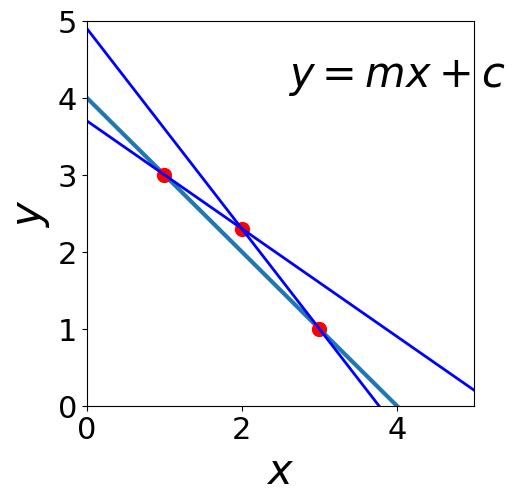

In [16]:
plot.over_determined_system(diagrams='./ml')

In [17]:
from ipywidgets import IntSlider
import notutils as nu

In [18]:
nu.display_plots('over_determined_system{samp:0>3}.svg',
                  directory='./ml',
                  samp=IntSlider(1,1,7,1))

interactive(children=(IntSlider(value=1, description='samp', max=7, min=1), Output()), _dom_classes=('widget-i…

## Pierre-Simon Laplace

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/overdetermined-laplace-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/overdetermined-laplace-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The solution was proposed by Pierre-Simon Laplace. His idea was to
accept that the model was an incomplete representation of the real
world, and the way it was incomplete is *unknown*. His idea was that
such unknowns could be dealt with through probability.

### Pierre-Simon Laplace

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplace-portrait.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplace-portrait.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//ml/Pierre-Simon_Laplace.png" style="width:30%">

Figure: <i>Pierre-Simon Laplace 1749-1827.</i>

In [19]:
import notutils as nu
nu.display_google_book(id='1YQPAAAAQAAJ', page='PR17-IA2')

Famously, Laplace considered the idea of a deterministic Universe, one
in which the model is *known*, or as the below translation refers to it,
“an intelligence which could comprehend all the forces by which nature
is animated”. He speculates on an “intelligence” that can submit this
vast data to analysis and propsoses that such an entity would be able to
predict the future.

> Given for one instant an intelligence which could comprehend all the
> forces by which nature is animated and the respective situation of the
> beings who compose it—an intelligence sufficiently vast to submit
> these data to analysis—it would embrace in the same formulate the
> movements of the greatest bodies of the universe and those of the
> lightest atom; for it, nothing would be uncertain and the future, as
> the past, would be present in its eyes.

This notion is known as *Laplace’s demon* or *Laplace’s superman*.

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//physics/laplacesDeterminismEnglish.png" style="width:60%">

Figure: <i>Laplace’s determinsim in English translation.</i>

## Laplace’s Gremlin

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplaces-determinism.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplaces-determinism.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Unfortunately, most analyses of his ideas stop at that point, whereas
his real point is that such a notion is unreachable. Not so much
*superman* as *strawman*. Just three pages later in the “Philosophical
Essay on Probabilities” (Laplace, 1814), Laplace goes on to observe:

> The curve described by a simple molecule of air or vapor is regulated
> in a manner just as certain as the planetary orbits; the only
> difference between them is that which comes from our ignorance.
>
> Probability is relative, in part to this ignorance, in part to our
> knowledge.

In [20]:
import notutils as nu
nu.display_google_book(id='1YQPAAAAQAAJ', page='PR17-IA4')

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//physics/philosophicaless00lapliala.png" style="width:60%">

Figure: <i>To Laplace, determinism is a strawman. Ignorance of mechanism
and data leads to uncertainty which should be dealt with through
probability.</i>

In other words, we can never make use of the idealistic deterministic
Universe due to our ignorance about the world, Laplace’s suggestion, and
focus in this essay is that we turn to probability to deal with this
uncertainty. This is also our inspiration for using probability in
machine learning. This is the true message of Laplace’s essay, not
determinism, but the gremlin of uncertainty that emerges from our
ignorance.

The “forces by which nature is animated” is our *model*, the “situation
of beings that compose it” is our *data* and the “intelligence
sufficiently vast enough to submit these data to analysis” is our
compute. The fly in the ointment is our *ignorance* about these aspects.
And *probability* is the tool we use to incorporate this ignorance
leading to uncertainty or *doubt* in our predictions.

## Latent Variables

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/laplace-latent-variable-solution.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/laplace-latent-variable-solution.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Laplace’s concept was that the reason that the data doesn’t match up to
the model is because of unconsidered factors, and that these might be
well represented through probability densities. He tackles the challenge
of the unknown factors by adding a variable, $\epsilon$, that represents
the unknown. In modern parlance we would call this a *latent* variable.
But in the context Laplace uses it, the variable is so common that it
has other names such as a “slack” variable or the *noise* in the system.

point 1: $x= 1$, $y=3$ $$
3 = m + c + \epsilon_1
$$ point 2: $x= 3$, $y=1$ $$
1 = 3m + c + \epsilon_2
$$ point 3: $x= 2$, $y=2.5$ $$
2.5 = 2m + c + \epsilon_3
$$

Laplace’s trick has converted the *overdetermined* system into an
*underdetermined* system. He has now added three variables,
$\{\epsilon_i\}_{i=1}^3$, which represent the unknown corruptions of the
real world. Laplace’s idea is that we should represent that unknown
corruption with a *probability distribution*.

## A Probabilistic Process

However, it was left to an admirer of Laplace to develop a practical
probability density for that purpose. It was Carl Friedrich Gauss who
suggested that the *Gaussian* density (which at the time was unnamed!)
should be used to represent this error.

The result is a *noisy* function, a function which has a deterministic
part, and a stochastic part. This type of function is sometimes known as
a probabilistic or stochastic process, to distinguish it from a
deterministic process.

## The Gaussian Density

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/univariate-gaussian.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/univariate-gaussian.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Gaussian density is perhaps the most commonly used probability
density. It is defined by a *mean*, $\mu$, and a *variance*, $\sigma^2$.
The variance is taken to be the square of the *standard deviation*,
$\sigma$.

$$\begin{align}
  p(y| \mu, \sigma^2) & = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y- \mu)^2}{2\sigma^2}\right)\\& \buildrel\triangle\over = \mathcal{N}\left(y|\mu,\sigma^2\right)
  \end{align}$$

In [ ]:
import mlai.plot as plot

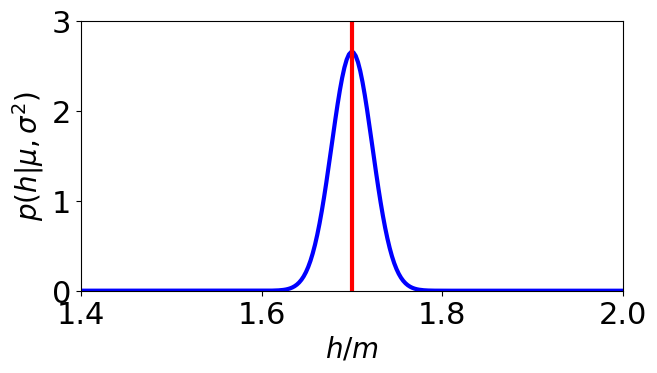

In [21]:
plot.gaussian_of_height(diagrams='./ml')

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/gaussian_of_height.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>The Gaussian PDF with ${\mu}=1.7$ and variance
${\sigma}^2=0.0225$. Mean shown as red line. It could represent the
heights of a population of students.</i>

## Two Important Gaussian Properties

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/univariate-gaussian-properties.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/univariate-gaussian-properties.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Gaussian density has many important properties, but for the moment
we’ll review two of them.

## Sum of Gaussians

If we assume that a variable, $y_i$, is sampled from a Gaussian density,

$$y_i \sim \mathcal{N}\left(\mu_i,\sigma_i^2\right)$$

Then we can show that the sum of a set of variables, each drawn
independently from such a density is also distributed as Gaussian. The
mean of the resulting density is the sum of the means, and the variance
is the sum of the variances,

$$
\sum_{i=1}^{n} y_i \sim \mathcal{N}\left(\sum_{i=1}^n\mu_i,\sum_{i=1}^n\sigma_i^2\right)
$$

Since we are very familiar with the Gaussian density and its properties,
it is not immediately apparent how unusual this is. Most random
variables, when you add them together, change the family of density they
are drawn from. For example, the Gaussian is exceptional in this regard.
Indeed, other random variables, if they are independently drawn and
summed together tend to a Gaussian density. That is the [*central limit
theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) which is
a major justification for the use of a Gaussian density.

## Scaling a Gaussian

Less unusual is the *scaling* property of a Gaussian density. If a
variable, $y$, is sampled from a Gaussian density,

$$y\sim \mathcal{N}\left(\mu,\sigma^2\right)$$ and we choose to scale
that variable by a *deterministic* value, $w$, then the *scaled
variable* is distributed as

$$wy\sim \mathcal{N}\left(w\mu,w^2 \sigma^2\right).$$ Unlike the summing
properties, where adding two or more random variables independently
sampled from a family of densitites typically brings the summed variable
*outside* that family, scaling many densities leaves the distribution of
that variable in the same *family* of densities. Indeed, many densities
include a *scale* parameter (e.g. the [Gamma
density](https://en.wikipedia.org/wiki/Gamma_distribution)) which is
purely for this purpose. In the Gaussian the standard deviation,
$\sigma$, is the scale parameter. To see why this makes sense, let’s
consider, $$z \sim \mathcal{N}\left(0,1\right),$$ then if we scale by
$\sigma$ so we have, $y=\sigma z$, we can write,
$$y=\sigma z \sim \mathcal{N}\left(0,\sigma^2\right)$$

## Laplace’s Idea

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-log-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-log-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Laplace had the idea to augment the observations by noise, that is
equivalent to considering a probability density whose mean is given by
the *prediction function*
$$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

This is known as *stochastic process*. It is a function that is
corrupted by noise. Laplace didn’t suggest the Gaussian density for that
purpose, that was an innovation from Carl Friederich Gauss, which is
what gives the Gaussian density its name.

## Height as a Function of Weight

In the standard Gaussian, parameterized by mean and variance, make the
mean a linear function of an *input*.

This leads to a regression model. $$
\begin{align*}
  y_i=&f\left(x_i\right)+\epsilon_i,\\
         \epsilon_i \sim & \mathcal{N}\left(0,\sigma^2\right).
  \end{align*}
$$

Assume $y_i$ is height and $x_i$ is weight.

# Sum of Squares Error

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/sum-of-squares-log-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/sum-of-squares-log-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Legendre

Minimizing the sum of squares error was first proposed by
[Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805
(Legendre, 1805). His book, which was on the orbit of comets, is
available on google books, we can take a look at the relevant page by
calling the code below.

In [22]:
import notutils as nu
nu.display_google_book(id='spcAAAAAMAAJ', page='PA72')

Figure: <i>Legendre’s book was on the determination of orbits of comets.
This page describes the formulation of least squares</i>

Of course, the main text is in French, but the key part we are
interested in can be roughly translated as

> In most matters where we take measures data through observation, the
> most accurate results they can offer, it is almost always leads to a
> system of equations of the form $$E = a + bx + cy + fz + etc .$$ where
> $a$, $b$, $c$, $f$ etc are the known coefficients and $x$, $y$, $z$
> etc are unknown and must be determined by the condition that the value
> of E is reduced, for each equation, to an amount or zero or very
> small.

He continues

> Of all the principles that we can offer for this item, I think it is
> not broader, more accurate, nor easier than the one we have used in
> previous research application, and that is to make the minimum sum of
> the squares of the errors. By this means, it is between the errors a
> kind of balance that prevents extreme to prevail, is very specific to
> make known the state of the closest to the truth system. The sum of
> the squares of the errors
> $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$
> being if we wanted a minimum, by varying x alone, we will have the
> equation …

This is the earliest know printed version of the problem of least
squares. The notation, however, is a little awkward for mordern eyes. In
particular Legendre doesn’t make use of the sum sign, $$
\sum_{i=1}^3 z_i = z_1 + z_2 + z_3
$$ nor does he make use of the inner product.

In our notation, if we were to do linear regression, we would need to
subsititue: $$\begin{align*}
a &\leftarrow y_1-c, \\ a^\prime &\leftarrow y_2-c,\\ a^{\prime\prime} &\leftarrow
y_3 -c,\\
\text{etc.}
\end{align*}$$ to introduce the data observations $\{y_i\}_{i=1}^{n}$
alongside $c$, the offset. We would then introduce the input locations
$$\begin{align*}
b & \leftarrow x_1,\\
b^\prime & \leftarrow x_2,\\
b^{\prime\prime} & \leftarrow x_3\\
\text{etc.}
\end{align*}$$ and finally the gradient of the function
$$x \leftarrow -m.$$ The remaining coefficients ($c$ and $f$) would then
be zero. That would give us $$\begin{align*}   &(y_1 -
(mx_1+c))^2 \\ + &(y_2 -(mx_2 + c))^2\\ + &(y_3 -(mx_3 + c))^2 \\ + & \text{etc.}
\end{align*}$$ which we would write in the modern notation for sums as
$$
\sum_{i=1}^n(y_i-(mx_i + c))^2
$$ which is recognised as the sum of squares error for a linear
regression.

This shows the advantage of modern [summation
operator](http://en.wikipedia.org/wiki/Summation), $\sum$, in keeping
our mathematical notation compact. Whilst it may look more complicated
the first time you see it, understanding the mathematical rules that go
around it, allows us to go much further with the notation.

Inner products (or [dot
products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They
allow us to write $$
\sum_{i=1}^q u_i v_i
$$ in a more compact notation, $\mathbf{u}\cdot\mathbf{v}.$

Here we are using bold face to represent vectors, and we assume that the
individual elements of a vector $\mathbf{z}$ are given as a series of
scalars $$
\mathbf{z} = \begin{bmatrix} z_1\\ z_2\\ \vdots\\ z_n
\end{bmatrix}
$$ which are each indexed by their position in the vector.

## Running Example: Olympic Marathons

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-linear-regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-linear-regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Note that `x` and `y` are not `pandas` data frames for this example,
they are just arrays of dimensionality $n\times 1$, where $n$ is the
number of data.

The aim of this lab is to have you coding linear regression in python.
We will do it in two ways, once using iterative updates (coordinate
ascent) and then using linear algebra. The linear algebra approach will
not only work much better, it is also easy to extend to multiple input
linear regression and *non-linear* regression using basis functions.

## Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we derived in the
lecture to fit a line, $y_i=mx_i + c$, to the data you’ve plotted. We
are trying to minimize the error function: $$
E(m, c) =  \sum_{i=1}^n(y_i-mx_i-c)^2
$$ with respect to $m$, $c$ and $\sigma^2$. We can start with an initial
guess for $m$,

In [23]:
m = -0.4
c = 80

Then we use the maximum likelihood update to find an estimate for the
offset, $c$.

## Coordinate Descent

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-coordinate-ascent.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-coordinate-ascent.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the movie recommender system example, we minimised the objective
function by steepest descent based gradient methods. Our updates
required us to compute the gradient at the position we were located,
then to update the gradient according to the direction of steepest
descent. This time, we will take another approach. It is known as
*coordinate descent*. In coordinate descent, we choose to move one
parameter at a time. Ideally, we design an algorithm that at each step
moves the parameter to its minimum value. At each step we choose to move
the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the
gradient is zero. This can be found by taking the gradient of $E(m,c)$
with respect to the parameter.

### Update for Offset

Let’s consider the parameter $c$ first. The gradient goes nicely through
the summation operator, and we obtain $$
\frac{\text{d}E(m,c)}{\text{d}c} = -\sum_{i=1}^n2(y_i-mx_i-c).
$$ Now we want the point that is a minimum. A minimum is an example of a
[*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the
stationary points are those points of the function where the gradient is
zero. They are found by solving the equation for
$\frac{\text{d}E(m,c)}{\text{d}c} = 0$. Substituting in to our gradient,
we can obtain the following equation, $$
0 = -\sum_{i=1}^n2(y_i-mx_i-c)
$$ which can be reorganised as follows, $$
c^* = \frac{\sum_{i=1}^n(y_i-m^*x_i)}{n}.
$$ The fact that the stationary point is easily extracted in this manner
implies that the solution is *unique*. There is only one stationary
point for this system. Traditionally when trying to determine the type
of stationary point we have encountered we now compute the *second
derivative*, $$
\frac{\text{d}^2E(m,c)}{\text{d}c^2} = 2n.
$$ The second derivative is positive, which in turn implies that we have
found a minimum of the function. This means that setting $c$ in this way
will take us to the lowest point along that axes.

In [24]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.0197711453593


## Update for Slope

Now we have the offset set to the minimum value, in coordinate descent,
the next step is to optimise another parameter. Only one further
parameter remains. That is the slope of the system.

Now we can turn our attention to the slope. We once again peform the
same set of computations to find the minima. We end up with an update
equation of the following form.

$$m^* = \frac{\sum_{i=1}^n(y_i - c)x_i}{\sum_{i=1}^nx_i^2}$$

Communication of mathematics in data science is an essential skill, in a
moment, you will be asked to rederive the equation above. Before we do
that, however, we will briefly review how to write mathematics in the
notebook.

## $\LaTeX$ for Maths

These cells use [Markdown
format](http://en.wikipedia.org/wiki/Markdown). You can include maths in
your markdown using [$\LaTeX$
syntax](http://en.wikipedia.org/wiki/LaTeX), all you have to do is write
your answer inside dollar signs, as follows:

To write a fraction, we write `$\frac{a}{b}$`, and it will display like
this $\frac{a}{b}$. To write a subscript we write `$a_b$` which will
appear as $a_b$. To write a superscript (for example in a polynomial) we
write `$a^b$` which will appear as $a^b$. There are lots of other macros
as well, for example we can do greek letters such as
`$\alpha, \beta, \gamma$` rendering as $\alpha, \beta, \gamma$. And we
can do sum and intergral signs as `$\sum \int \int$`.

You can combine many of these operations together for composing
expressions.

### Exercise 1

Convert the following python code expressions into $\LaTeX$j, writing
your answers below. In each case write your answer as a single equality
(i.e. your maths should only contain one expression, not several lines
of expressions). For the purposes of your $\LaTeX$ please assume that
`x` and `w` are $n$ dimensional vectors.

`(a) f = x.sum()`

`(b) m = x.mean()`

`(c) g = (x*w).sum()`

### Exercise 1 Answer

Write your answer to Exercise 1 here

$\sum x$
$\frac {\sum x} {n}$

In [27]:
f = x.sum()
m=x.mean()
g=(x*x).sum()

## Fixed Point Updates

Worked example.

$$
\begin{aligned}
    c^{*}=&\frac{\sum
_{i=1}^{n}\left(y_i-m^{*}x_i\right)}{n},\\
    m^{*}=&\frac{\sum
_{i=1}^{n}x_i\left(y_i-c^{*}\right)}{\sum _{i=1}^{n}x_i^{2}},\\
\left.\sigma^2\right.^{*}=&\frac{\sum
_{i=1}^{n}\left(y_i-m^{*}x_i-c^{*}\right)^{2}}{n}
\end{aligned}
$$

## Gradient With Respect to the Slope

Now that you’ve had a little training in writing maths with $\LaTeX$, we
will be able to use it to answer questions. The next thing we are going
to do is a little differentiation practice.

### Exercise 2

Derive the the gradient of the objective function with respect to the
slope, $m$. Rearrange it to show that the update equation written above
does find the stationary points of the objective function. By computing
its derivative show that it’s a minimum.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [28]:
m = ((y - c)*x).sum()/(x**2).sum()
print(m)

-0.3998724072997095


We can have a look at how good our fit is by computing the prediction
across the input space. First create a vector of ‘test points’,

In [29]:
import numpy as np

In [30]:
x_test = np.linspace(1890, 2020, 130)[:, None]

Now use this vector to compute some test predictions,

In [51]:
f_test = m*x_test + c

Now plot those test predictions with a blue line on the same plot as the
data,

In [32]:
import matplotlib.pyplot as plt

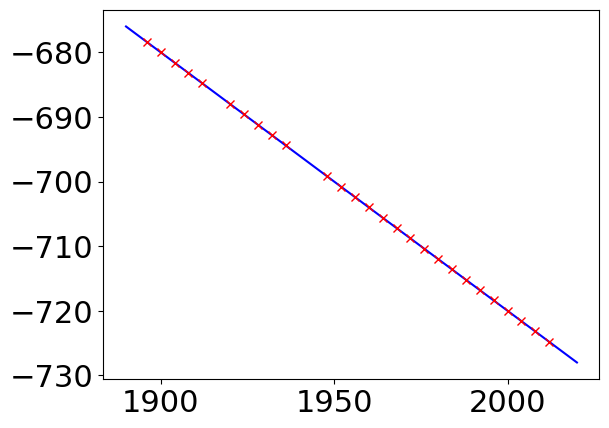

In [52]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn’t very good, we need to iterate between these parameter
updates in a loop to improve the fit, we have to do this several times,

In [34]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.3987259642505432
783.5273797273478


And let’s try plotting the result again

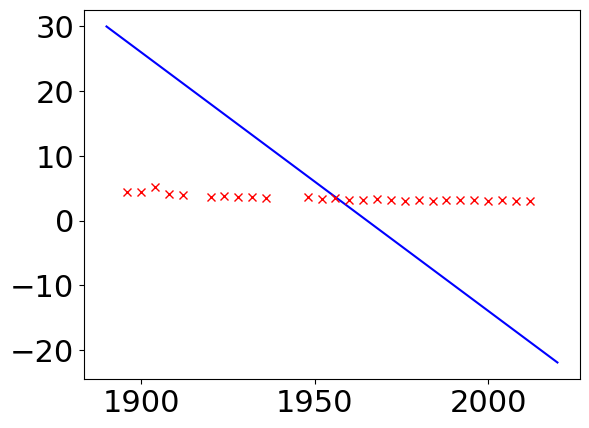

In [35]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will
add more iterations and report on the error as optimisation proceeds.

### Exercise 3

There is a problem here, we seem to need many interations to get to a
good solution. Let’s explore what’s going on. Write code which
alternates between updates of `c` and `m`. Include the following
features in your code.

1.  Initialise with `m=-0.4` and `c=80`.
2.  Every 10 iterations compute the value of the objective function for
    the training data and print it to the screen (you’ll find hints on
    this in [the lab from last week](./week2.ipynb)).
3.  Cause the code to stop running when the error change over less than
    10 iterations is smaller than $1\times10^{-4}$. This is known as a
    stopping criterion.

Why do we need so many iterations to get to the solution?

In [49]:
# Write your answer to Exercise 3 here
m = -0.4
c = 80

y_pred = m*x + c

while (((y - y_pred)**2).sum() >= 0.0001):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y - m*x).sum()/y.shape[0]
    y_pred = m*x+c
    print("hi")


## Important Concepts Not Covered

-   Other optimization methods:
    -   Second order methods, conjugate gradient, quasi-Newton and
        Newton.
-   Effective heuristics such as momentum.
-   Local vs global solutions.

## Objective Functions and Regression

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import mlai

In [54]:
x = np.random.normal(size=(4, 1))

In [55]:
m_true = 1.4
c_true = -3.1

In [56]:
y = m_true*x+c_true

In [57]:
import matplotlib.pyplot as plt

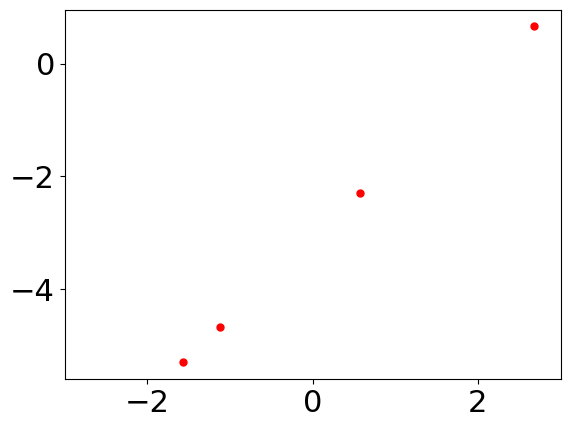

In [58]:
plt.plot(x, y, 'r.', markersize=10) # plot data as red dots
plt.xlim([-3, 3])
mlai.write_figure(filename='regression.svg', directory='./ml', transparent=True)

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>A simple linear regression.</i>

## Noise Corrupted Plot

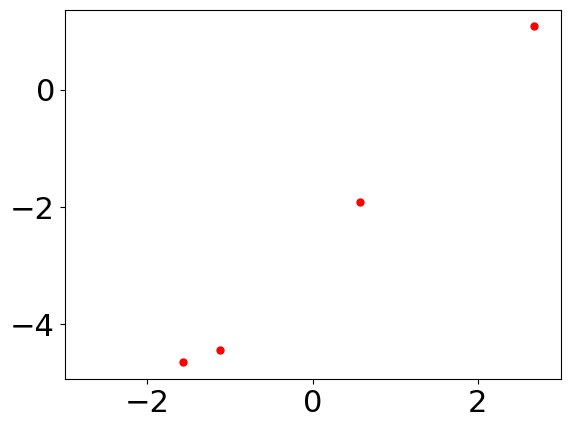

In [59]:
noise = np.random.normal(scale=0.5, size=(4, 1)) # standard deviation of the noise is 0.5
y = m_true*x + c_true + noise
plt.plot(x, y, 'r.', markersize=10)
plt.xlim([-3, 3])
mlai.write_figure(filename='regression_noise.svg', directory='./ml', transparent=True)

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression_noise.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>A simple linear regression with noise.</i>

## Contour Plot of Error Function

-   Visualise the error function surface, create vectors of values.

In [60]:
# create an array of linearly separated values around m_true
m_vals = np.linspace(m_true-3, m_true+3, 100)
# create an array of linearly separated values ae
c_vals = np.linspace(c_true-3, c_true+3, 100)

-   create a grid of values to evaluate the error function in 2D.

In [61]:
m_grid, c_grid = np.meshgrid(m_vals, c_vals)

-   compute the error function at each combination of $c$ and $m$.

In [62]:
E_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        E_grid[i, j] = ((y - m_grid[i, j]*x - c_grid[i, j])**2).sum()

## Contour Plot of Error

In [63]:
import mlai.plot as plot
import mlai

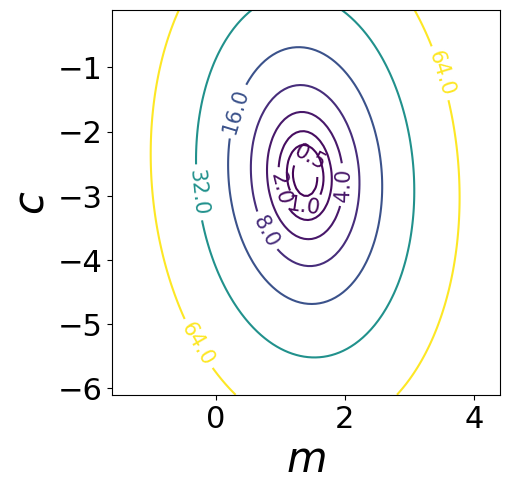

In [64]:
f, ax = plt.subplots(figsize=(5,5))
plot.regression_contour(f, ax, m_vals, c_vals, E_grid)
mlai.write_figure(filename='regression_contour.svg', directory='./ml')

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression_contour.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Contours of the objective function for linear regression by
minimizing least squares.</i>

## Steepest Descent

## Algorithm

-   We start with a guess for $m$ and $c$.

In [65]:
m_star = 0.0
c_star = -5.0

## Offset Gradient

-   Now we need to compute the gradient of the error function, firstly
    with respect to $c$, $$
      \frac{\text{d}E(m, c)}{\text{d} c} = -2\sum_{i=1}^n(y_i - mx_i - c)
      $$

-   This is computed in python as follows

In [66]:
c_grad = -2*(y-m_star*x - c_star).sum()
print("Gradient with respect to c is ", c_grad)

Gradient with respect to c is  -20.09864937806067


## Deriving the Gradient

To see how the gradient was derived, first note that the $c$ appears in
every term in the sum. So we are just differentiating
$(y_i - mx_i - c)^2$ for each term in the sum. The gradient of this term
with respect to $c$ is simply the gradient of the outer quadratic,
multiplied by the gradient with respect to $c$ of the part inside the
quadratic. The gradient of a quadratic is two times the argument of the
quadratic, and the gradient of the inside linear term is just minus one.
This is true for all terms in the sum, so we are left with the sum in
the gradient.

## Slope Gradient

The gradient with respect tom $m$ is similar, but now the gradient of
the quadratic’s argument is $-x_i$ so the gradient with respect to $m$
is

$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^nx_i(y_i - mx_i -
c)$$

which can be implemented in python (numpy) as

In [67]:
m_grad = -2*(x*(y-m_star*x - c_star)).sum()
print("Gradient with respect to m is ", m_grad)

Gradient with respect to m is  -33.83554350462852


## Update Equations

-   Now we have gradients with respect to $m$ and $c$.
-   Can update our inital guesses for $m$ and $c$ using the gradient.
-   We don’t want to just subtract the gradient from $m$ and $c$,
-   We need to take a *small* step in the gradient direction.
-   Otherwise we might overshoot the minimum.
-   We want to follow the gradient to get to the minimum, the gradient
    changes all the time.

## Move in Direction of Gradient

In [68]:
import mlai.plot as plot

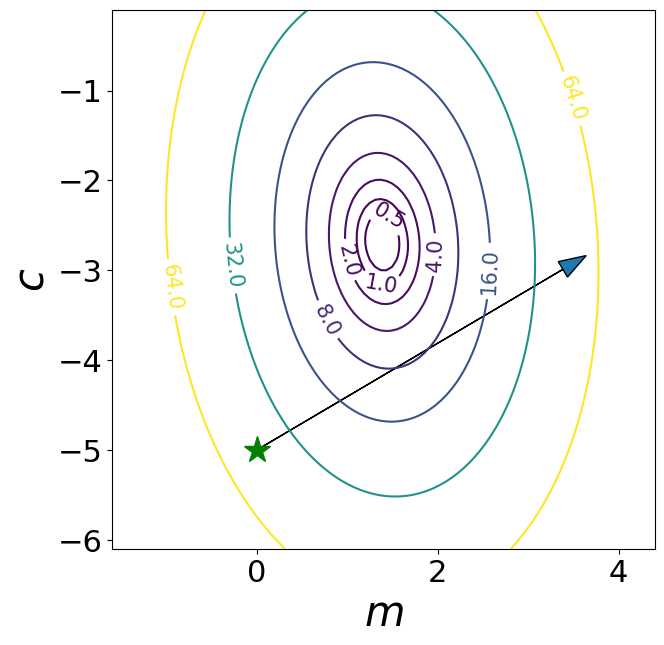

In [69]:
f, ax = plt.subplots(figsize=plot.big_figsize)
plot.regression_contour(f, ax, m_vals, c_vals, E_grid)
ax.plot(m_star, c_star, 'g*', markersize=20)
ax.arrow(m_star, c_star, -m_grad*0.1, -c_grad*0.1, head_width=0.2)
mlai.write_figure(filename='regression_contour_step001.svg', directory='./ml/', transparent=True)

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression_contour_step001.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Single update descending the contours of the error surface
for regression.</i>

## Update Equations

-   The step size has already been introduced, it’s again known as the
    learning rate and is denoted by $\eta$. $$
    c_\text{new}\leftarrow c_{\text{old}} - \eta\frac{\text{d}E(m, c)}{\text{d}c}
    $$

-   gives us an update for our estimate of $c$ (which in the code we’ve
    been calling `c_star` to represent a common way of writing a
    parameter estimate, $c^*$) and $$
    m_\text{new} \leftarrow m_{\text{old}} - \eta\frac{\text{d}E(m, c)}{\text{d}m}
    $$

-   Giving us an update for $m$.

## Update Code

-   These updates can be coded as

In [70]:
print("Original m was", m_star, "and original c was", c_star)
learn_rate = 0.01
c_star = c_star - learn_rate*c_grad
m_star = m_star - learn_rate*m_grad
print("New m is", m_star, "and new c is", c_star)

Original m was 0.0 and original c was -5.0
New m is 0.3383554350462852 and new c is -4.799013506219393


# Iterating Updates

-   Fit model by descending gradient.

## Gradient Descent Algorithm

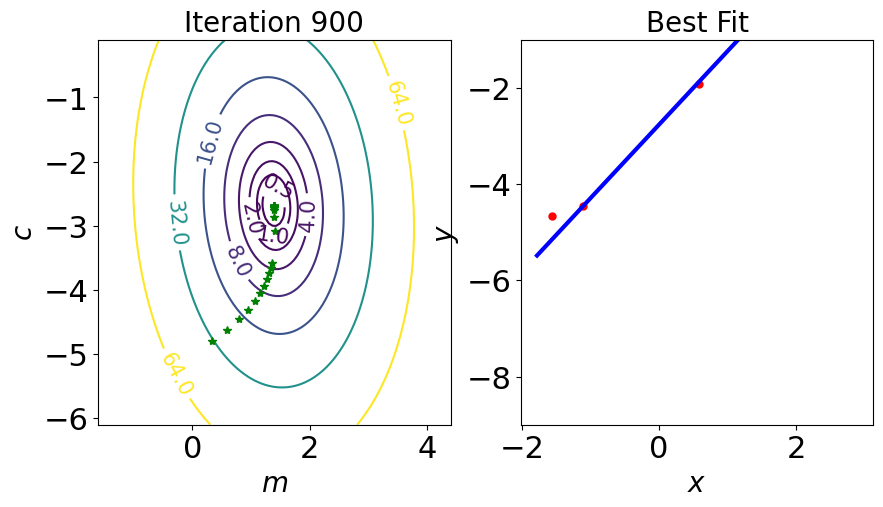

In [71]:
num_plots = plot.regression_contour_fit(x, y, diagrams='./ml')

In [72]:
import notutils as nu
from ipywidgets import IntSlider

In [73]:
import notutils as nu

In [74]:
nu.display_plots('regression_contour_fit{num:0>3}.svg', directory='./ml', num=IntSlider(0, 0, num_plots, 1))

interactive(children=(IntSlider(value=0, description='num', max=28), Output()), _dom_classes=('widget-interact…

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression_contour_fit028.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Batch gradient descent for linear regression</i>

## Stochastic Gradient Descent

-   If $n$ is small, gradient descent is fine.
-   But sometimes (e.g. on the internet $n$ could be a billion.
-   Stochastic gradient descent is more similar to perceptron.
-   Look at gradient of one data point at a time rather than summing
    across *all* data points)
-   This gives a stochastic estimate of gradient.

## Stochastic Gradient Descent

-   The real gradient with respect to $m$ is given by

    $$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^nx_i(y_i -
    mx_i - c)$$

    but it has $n$ terms in the sum. Substituting in the gradient we can
    see that the full update is of the form

    $$m_\text{new} \leftarrow
    m_\text{old} + 2\eta\left[x_1 (y_1 - m_\text{old}x_1 - c_\text{old}) + (x_2 (y_2 -   m_\text{old}x_2 - c_\text{old}) + \dots + (x_n (y_n - m_\text{old}x_n - c_\text{old})\right]$$

    This could be split up into lots of individual updates
    $$m_1 \leftarrow m_\text{old} + 2\eta\left[x_1 (y_1 - m_\text{old}x_1 -
    c_\text{old})\right]$$ $$m_2 \leftarrow m_1 + 2\eta\left[x_2 (y_2 -
    m_\text{old}x_2 - c_\text{old})\right]$$
    $$m_3 \leftarrow m_2 + 2\eta
    \left[\dots\right]$$
    $$m_n \leftarrow m_{n-1} + 2\eta\left[x_n (y_n -
    m_\text{old}x_n - c_\text{old})\right]$$

which would lead to the same final update.

## Updating $c$ and $m$

-   In the sum we don’t $m$ and $c$ we use for computing the gradient
    term at each update.
-   In stochastic gradient descent we *do* change them.
-   This means it’s not quite the same as steepest desceint.
-   But we can present each data point in a random order, like we did
    for the perceptron.
-   This makes the algorithm suitable for large scale web use (recently
    this domain is know as ‘Big Data’) and algorithms like this are
    widely used by Google, Microsoft, Amazon, Twitter and Facebook.

## Stochastic Gradient Descent

-   Or more accurate, since the data is normally presented in a random
    order we just can write $$
    m_\text{new} = m_\text{old} + 2\eta\left[x_i (y_i - m_\text{old}x_i - c_\text{old})\right]
    $$

In [75]:
# choose a random point for the update
i = np.random.randint(x.shape[0]-1)
# update m
m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
# update c
c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)

## SGD for Linear Regression

Putting it all together in an algorithm, we can do stochastic gradient
descent for our regression data.

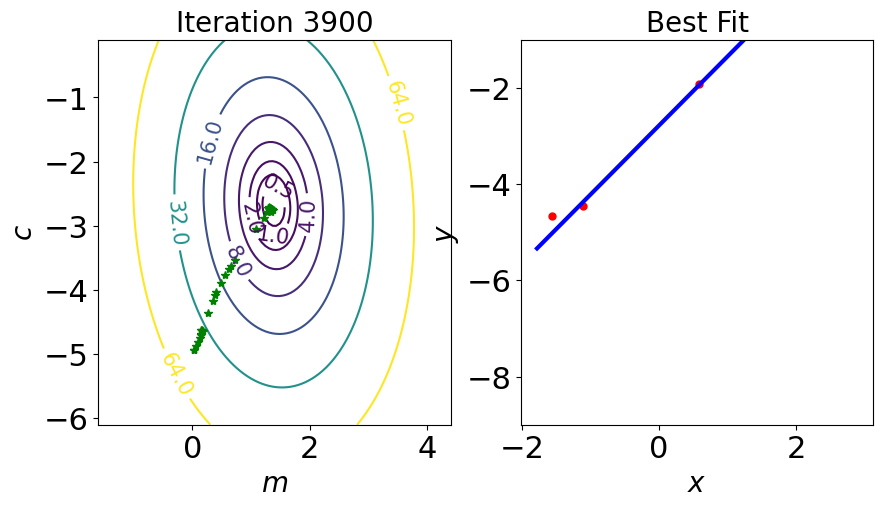

In [76]:
num_plots = plot.regression_contour_sgd(x, y, diagrams='./ml')

In [77]:
import notutils as nu
from ipywidgets import IntSlider

In [78]:
import notutils as nu

In [79]:
nu.display_plots('regression_sgd_contour_fit{num:0>3}.svg',
    directory='./ml', num=IntSlider(0, 0, num_plots, 1))

interactive(children=(IntSlider(value=0, description='num', max=58), Output()), _dom_classes=('widget-interact…

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/regression_sgd_contour_fit058.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Stochastic gradient descent for linear regression.</i>

## Reflection on Linear Regression and Supervised Learning

Think about:

1.  What effect does the learning rate have in the optimization? What’s
    the effect of making it too small, what’s the effect of making it
    too big? Do you get the same result for both stochastic and steepest
    gradient descent?

2.  The stochastic gradient descent doesn’t help very much for such a
    small data set. It’s real advantage comes when there are many,
    you’ll see this in the lab.

## Log Likelihood for Multivariate Regression

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-multivariate-log-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-multivariate-log-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Quadratic Loss

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-direct-solution.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-direct-solution.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we’ve identified the empirical risk with the loss, we’ll use
$E(\mathbf{ w})$ to represent our objective function. $$
E(\mathbf{ w}) = \sum_{i=1}^n\left(y_i - f(\mathbf{ x}_i, \mathbf{ w})\right)^2
$$ gives us our objective.

In the case of the linear prediction function, we can substitute
$f(\mathbf{ x}_i, \mathbf{ w}) = \mathbf{ w}^\top \mathbf{ x}_i$. $$
E(\mathbf{ w}) = \sum_{i=1}^n\left(y_i - \mathbf{ w}^\top \mathbf{ x}_i\right)^2
$$ To compute the gradient of the objective, we first expand the
brackets.

## Bracket Expansion

$$
\begin{align*}
  E(\mathbf{ w},\sigma^2)  = &
\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum
_{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum
_{i=1}^{n}y_i\mathbf{ w}^{\top}\mathbf{ x}_i\\&+\frac{1}{2\sigma^2}\sum
_{i=1}^{n}\mathbf{ w}^{\top}\mathbf{ x}_i\mathbf{ x}_i^{\top}\mathbf{ w}
+\text{const}.\\
    = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum
_{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
\mathbf{ w}^\top\sum_{i=1}^{n}\mathbf{ x}_iy_i\\&+\frac{1}{2\sigma^2}
\mathbf{ w}^{\top}\left[\sum
_{i=1}^{n}\mathbf{ x}_i\mathbf{ x}_i^{\top}\right]\mathbf{ w}+\text{const}.
\end{align*}
$$

# Solution with Linear Algebra

In this section we’re going compute the minimum of the quadratic loss
with respect to the parameters. When we do this, we’ll also review
*linear algebra*. We will represent all our errors and functions in the
form of matrices and vectors.

Linear algebra is just a shorthand for performing lots of
multiplications and additions simultaneously. What does it have to do
with our system then? Well, the first thing to note is that the classic
linear function we fit for a one-dimensional regression has the form: $$
f(x) = mx + c
$$ the classical form for a straight line. From a linear algebraic
perspective, we are looking for multiplications and additions. We are
also looking to separate our parameters from our data. The data is the
*givens*. In French the word is données literally translated means
*givens* that’s great, because we don’t need to change the data, what we
need to change are the parameters (or variables) of the model. In this
function the data comes in through $x$, and the parameters are $m$ and
$c$.

What we’d like to create is a vector of parameters and a vector of data.
Then we could represent the system with vectors that represent the data,
and vectors that represent the parameters.

We look to turn the multiplications and additions into a linear
algebraic form, we have one multiplication ($m\times c$) and one
addition ($mx + c$). But we can turn this into an inner product by
writing it in the following way, $$
f(x) = m \times x +
c \times 1,
$$ in other words, we’ve extracted the unit value from the offset, $c$.
We can think of this unit value like an extra item of data, because it
is always given to us, and it is always set to 1 (unlike regular data,
which is likely to vary!). We can therefore write each input data
location, $\mathbf{ x}$, as a vector $$
\mathbf{ x}= \begin{bmatrix} 1\\ x\end{bmatrix}.
$$

Now we choose to also turn our parameters into a vector. The parameter
vector will be defined to contain $$
\mathbf{ w}= \begin{bmatrix} c \\ m\end{bmatrix}
$$ because if we now take the inner product between these two vectors we
recover $$
\mathbf{ x}\cdot\mathbf{ w}= 1 \times c + x \times m = mx + c
$$ In `numpy` we can define this vector as follows

In [ ]:
import numpy as np

In [80]:
# define the vector w
w = np.zeros(shape=(2, 1))
w[0] = m
w[1] = c

This gives us the equivalence between original operation and an
operation in vector space. Whilst the notation here isn’t a lot shorter,
the beauty is that we will be able to add as many features as we like
and keep the same representation. In general, we are now moving to a
system where each of our predictions is given by an inner product. When
we want to represent a linear product in linear algebra, we tend to do
it with the transpose operation, so since we have
$\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top\mathbf{b}$ we can write $$
f(\mathbf{ x}_i) = \mathbf{ x}_i^\top\mathbf{ w}.
$$ Where we’ve assumed that each data point, $\mathbf{ x}_i$, is now
written by appending a 1 onto the original vector $$
\mathbf{ x}_i = \begin{bmatrix}
1 \\
x_i
\end{bmatrix}
$$

# Design Matrix

We can do this for the entire data set to form a [*design
matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\mathbf{X}$, $$
\mathbf{X}
= \begin{bmatrix}
\mathbf{ x}_1^\top \\\
\mathbf{ x}_2^\top \\\
\vdots \\\
\mathbf{ x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots
& \vdots \\\
1 & x_n
\end{bmatrix},
$$ which in `numpy` can be done with the following commands:

In [81]:
import numpy as np

In [82]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[ 1.         -1.57260412]
 [ 1.          0.57561372]
 [ 1.         -1.1179641 ]
 [ 1.          2.68322148]]


## Writing the Objective with Linear Algebra

When we think of the objective function, we can think of it as the
errors where the error is defined in a similar way to what it was in
Legendre’s day $y_i - f(\mathbf{ x}_i)$, in statistics these errors are
also sometimes called
[*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics).
So, we can think as the objective and the prediction function as two
separate parts, first we have, $$
E(\mathbf{ w}) = \sum_{i=1}^n(y_i - f(\mathbf{ x}_i; \mathbf{ w}))^2,
$$ where we’ve made the function $f(\cdot)$’s dependence on the
parameters $\mathbf{ w}$ explicit in this equation. Then we have the
definition of the function itself, $$
f(\mathbf{ x}_i; \mathbf{ w}) = \mathbf{ x}_i^\top \mathbf{ w}.
$$ Let’s look again at these two equations and see if we can identify
any inner products. The first equation is a sum of squares, which is
promising. Any sum of squares can be represented by an inner product, $$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b}.
$$ If we wish to represent $E(\mathbf{ w})$ in this way, all we need to
do is convert the sum operator to an inner product. We can get a vector
from that sum operator by placing both $y_i$ and
$f(\mathbf{ x}_i; \mathbf{ w})$ into vectors, which we do by defining $$
\mathbf{ y}= \begin{bmatrix}y_1\\ y_2\\ \vdots \\ y_n\end{bmatrix}
$$ and defining $$
\mathbf{ f}(\mathbf{ x}_1; \mathbf{ w}) = \begin{bmatrix}f(\mathbf{ x}_1; \mathbf{ w})\\ f(\mathbf{ x}_2; \mathbf{ w})\\ \vdots \\ f(\mathbf{ x}_n; \mathbf{ w})\end{bmatrix}.
$$ The second of these is a vector-valued function. This term may appear
intimidating, but the idea is straightforward. A vector valued function
is simply a vector whose elements are themselves defined as *functions*,
i.e., it is a vector of functions, rather than a vector of scalars. The
idea is so straightforward, that we are going to ignore it for the
moment, and barely use it in the derivation. But it will reappear later
when we introduce *basis functions*. So, we will for the moment ignore
the dependence of $\mathbf{ f}$ on $\mathbf{ w}$ and $\mathbf{X}$ and
simply summarise it by a vector of numbers $$
\mathbf{ f}= \begin{bmatrix}f_1\\f_2\\
\vdots \\ f_n\end{bmatrix}.
$$ This allows us to write our objective in the folowing, linear
algebraic form, $$
E(\mathbf{ w}) = (\mathbf{ y}- \mathbf{ f})^\top(\mathbf{ y}- \mathbf{ f})
$$ from the rules of inner products. But what of our matrix $\mathbf{X}$
of input data? At this point, we need to dust off [*matrix-vector
multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication).
Matrix multiplication is simply a convenient way of performing many
inner products together, and it’s exactly what we need to summarize the
operation $$
f_i = \mathbf{ x}_i^\top\mathbf{ w}.
$$ This operation tells us that each element of the vector $\mathbf{ f}$
(our vector valued function) is given by an inner product between
$\mathbf{ x}_i$ and $\mathbf{ w}$. In other words, it is a series of
inner products. Let’s look at the definition of matrix multiplication,
it takes the form $$
\mathbf{c} = \mathbf{B}\mathbf{a},
$$ where $\mathbf{c}$ might be a $k$ dimensional vector (which we can
interpret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a
$k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional
vector ($k\times 1$ dimensional matrix).

The result of this multiplication is of the form $$
\begin{bmatrix}c_1\\c_2 \\ \vdots \\
a_k\end{bmatrix} =
\begin{bmatrix} b_{1,1} & b_{1, 2} & \dots & b_{1, k} \\
b_{2, 1} & b_{2, 2} & \dots & b_{2, k} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k, 1} & b_{k, 2} & \dots & b_{k, k} \end{bmatrix} \begin{bmatrix}a_1\\a_2 \\
\vdots\\ c_k\end{bmatrix} = \begin{bmatrix} b_{1, 1}a_1 + b_{1, 2}a_2 + \dots +
b_{1, k}a_k\\
b_{2, 1}a_1 + b_{2, 2}a_2 + \dots + b_{2, k}a_k \\
\vdots\\
b_{k, 1}a_1 + b_{k, 2}a_2 + \dots + b_{k, k}a_k\end{bmatrix}.
$$ We see that each element of the result, $\mathbf{a}$ is simply the
inner product between each *row* of $\mathbf{B}$ and the vector
$\mathbf{c}$. Because we have defined each element of $\mathbf{ f}$ to
be given by the inner product between each *row* of the design matrix
and the vector $\mathbf{ w}$ we now can write the full operation in one
matrix multiplication,

$$
\mathbf{ f}= \mathbf{X}\mathbf{ w}.
$$

In [ ]:
import numpy as np

In [ ]:
f = X@w # The @ sign performs matrix multiplication

Combining this result with our objective function, $$
E(\mathbf{ w}) = (\mathbf{ y}- \mathbf{ f})^\top(\mathbf{ y}- \mathbf{ f})
$$ we find we have defined the *model* with two equations. One equation
tells us the form of our predictive function and how it depends on its
parameters, the other tells us the form of our objective function.

In [ ]:
resid = (y-f)
E = np.dot(resid.T, resid) # matrix multiplication on a single vector is equivalent to a dot product.
print("Error function is:", E)

### Exercise 4

The prediction for our movie recommender system had the form $$
f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j
$$ and the objective function was then $$
E = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i, j})^2
$$ Try writing this down in matrix and vector form. How many of the
terms can you do? For each variable and parameter carefully think about
whether it should be represented as a matrix or vector. Do as many of
the terms as you can. Use $\LaTeX$ to give your answers and give the
*dimensions* of any matrices you create.

### Exercise 4 Answer

Write your answer to Exercise 4 here

# Objective Optimization

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-objective-optimisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-objective-optimisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Our *model* has now been defined with two equations: the prediction
function and the objective function. Now we will use multivariate
calculus to define an *algorithm* to fit the model. The separation
between model and algorithm is important and is often overlooked. Our
model contains a function that shows how it will be used for prediction,
and a function that describes the objective function we need to optimize
to obtain a good set of parameters.

The model linear regression model we have described is still the same as
the one we fitted above with a coordinate ascent algorithm. We have only
played with the notation to obtain the same model in a matrix and vector
notation. However, we will now fit this model with a different
algorithm, one that is much faster. It is such a widely used algorithm
that from the end user’s perspective it doesn’t even look like an
algorithm, it just appears to be a single operation (or function).
However, underneath the computer calls an algorithm to find the
solution. Further, the algorithm we obtain is very widely used, and
because of this it turns out to be highly optimized.

Once again, we are going to try and find the stationary points of our
objective by finding the *stationary points*. However, the stationary
points of a multivariate function, are a little bit more complex to
find. As before we need to find the point at which the gradient is zero,
but now we need to use *multivariate calculus* to find it. This involves
learning a few additional rules of differentiation (that allow you to do
the derivatives of a function with respect to vector), but in the end it
makes things quite a bit easier. We define vectorial derivatives as
follows, $$
\frac{\text{d}E(\mathbf{ w})}{\text{d}\mathbf{ w}} =
\begin{bmatrix}\frac{\text{d}E(\mathbf{ w})}{\text{d}w_1}\\\frac{\text{d}E(\mathbf{ w})}{\text{d}w_2}\end{bmatrix}.
$$ where $\frac{\text{d}E(\mathbf{ w})}{\text{d}w_1}$ is the [partial
derivative](http://en.wikipedia.org/wiki/Partial_derivative) of the
error function with respect to $w_1$.

Differentiation through multiplications and additions is relatively
straightforward, and since linear algebra is just multiplication and
addition, then its rules of differentiation are quite straightforward
too, but slightly more complex than regular derivatives.

## Multivariate Derivatives

We will need two rules of multivariate or *matrix* differentiation. The
first is differentiation of an inner product. By remembering that the
inner product is made up of multiplication and addition, we can hope
that its derivative is quite straightforward, and so it proves to be. We
can start by thinking about the definition of the inner product, $$
\mathbf{a}^\top\mathbf{z} = \sum_{i} a_i
z_i,
$$ which if we were to take the derivative with respect to $z_k$ would
simply return the gradient of the one term in the sum for which the
derivative was non-zero, that of $a_k$, so we know that $$
\frac{\text{d}}{\text{d}z_k} \mathbf{a}^\top \mathbf{z} = a_k
$$ and by our definition for multivariate derivatives, we can simply
stack all the partial derivatives of this form in a vector to obtain the
result that $$
\frac{\text{d}}{\text{d}\mathbf{z}}
\mathbf{a}^\top \mathbf{z} = \mathbf{a}.
$$ The second rule that’s required is differentiation of a ‘matrix
quadratic’. A scalar quadratic in $z$ with coefficient $c$ has the form
$cz^2$. If $\mathbf{z}$ is a $k\times 1$ vector and $\mathbf{C}$ is a
$k \times k$ *matrix* of coefficients then the matrix quadratic form is
written as $\mathbf{z}^\top \mathbf{C}\mathbf{z}$, which is itself a
*scalar* quantity, but it is a function of a *vector*.

### Matching Dimensions in Matrix Multiplications

There’s a trick for telling a multiplication leads to a scalar result.
When you are doing mathematics with matrices, it’s always worth pausing
to perform a quick sanity check on the dimensions. Matrix multplication
only works when the dimensions match. To be precise, the ‘inner’
dimension of the matrix must match. What is the inner dimension? If we
multiply two matrices $\mathbf{A}$ and $\mathbf{B}$, the first of which
has $k$ rows and $\ell$ columns and the second of which has $p$ rows and
$q$ columns, then we can check whether the multiplication works by
writing the dimensionalities next to each other, $$
\mathbf{A} \mathbf{B} \rightarrow (k \times
\underbrace{\ell)(p}_\text{inner dimensions} \times q) \rightarrow (k\times q).
$$ The inner dimensions are the two inside dimensions, $\ell$ and $p$.
The multiplication will only work if $\ell=p$. The result of the
multiplication will then be a $k\times q$ matrix: this dimensionality
comes from the ‘outer dimensions’. Note that matrix multiplication is
not [*commutative*](http://en.wikipedia.org/wiki/Commutative_property).
And if you change the order of the multiplication, $$
\mathbf{B} \mathbf{A} \rightarrow (\ell \times \underbrace{k)(q}_\text{inner dimensions} \times p) \rightarrow (\ell \times p).
$$ Firstly, it may no longer even work, because now the condition is
that $k=q$, and secondly the result could be of a different
dimensionality. An exception is if the matrices are square matrices
(e.g., same number of rows as columns) and they are both *symmetric*. A
symmetric matrix is one for which $\mathbf{A}=\mathbf{A}^\top$, or
equivalently, $a_{i,j} = a_{j,i}$ for all $i$ and $j$.

For applying and developing machine learning algorithms you should get
familiar with working with matrices and vectors. You should have come
across them before, but you may not have used them as extensively as we
are doing now. It’s worth getting used to using this trick to check your
work and ensure you know what the dimension of an output matrix should
be. For our matrix quadratic form, it turns out that we can see it as a
special type of inner product. $$
\mathbf{z}^\top\mathbf{C}\mathbf{z} \rightarrow (1\times
\underbrace{k) (k}_\text{inner dimensions}\times k) (k\times 1) \rightarrow
\mathbf{b}^\top\mathbf{z}
$$ where $\mathbf{b} = \mathbf{C}\mathbf{z}$ so therefore the result is
a scalar, $$
\mathbf{b}^\top\mathbf{z} \rightarrow
(1\times \underbrace{k) (k}_\text{inner dimensions}\times 1) \rightarrow
(1\times 1)
$$ where a $(1\times 1)$ matrix is recognised as a scalar.

This implies that we should be able to differentiate this form, and
indeed the rule for its differentiation is slightly more complex than
the inner product, but still quite simple, $$
\frac{\text{d}}{\text{d}\mathbf{z}}
\mathbf{z}^\top\mathbf{C}\mathbf{z}= \mathbf{C}\mathbf{z} + \mathbf{C}^\top
\mathbf{z}.
$$ Note that in the special case where $\mathbf{C}$ is symmetric then we
have $\mathbf{C} = \mathbf{C}^\top$ and the derivative simplifies to $$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}=
2\mathbf{C}\mathbf{z}.
$$

## Differentiate the Objective

First, we need to compute the full objective by substituting our
prediction function into the objective function to obtain the objective
in terms of $\mathbf{ w}$. Doing this we obtain $$
E(\mathbf{ w})= (\mathbf{ y}- \mathbf{X}\mathbf{ w})^\top (\mathbf{ y}- \mathbf{X}\mathbf{ w}).
$$ We now need to differentiate this *quadratic form* to find the
minimum. We differentiate with respect to the *vector* $\mathbf{ w}$.
But before we do that, we’ll expand the brackets in the quadratic form
to obtain a series of scalar terms. The rules for bracket expansion
across the vectors are similar to those for the scalar system giving, $$
(\mathbf{a} - \mathbf{b})^\top
(\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top
\mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$ which substituting for $\mathbf{a} = \mathbf{c} = \mathbf{ y}$ and
$\mathbf{b}=\mathbf{d} = \mathbf{X}\mathbf{ w}$ gives $$
E(\mathbf{ w})=
\mathbf{ y}^\top\mathbf{ y}- 2\mathbf{ y}^\top\mathbf{X}\mathbf{ w}+
\mathbf{ w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{ w}
$$ where we used the fact that
$\mathbf{ y}^\top\mathbf{X}\mathbf{ w}=\mathbf{ w}^\top\mathbf{X}^\top\mathbf{ y}$.

Now we can use our rules of differentiation to compute the derivative of
this form, which is, $$
\frac{\text{d}}{\text{d}\mathbf{ w}}E(\mathbf{ w})=- 2\mathbf{X}^\top \mathbf{ y}+
2\mathbf{X}^\top\mathbf{X}\mathbf{ w},
$$ where we have exploited the fact that $\mathbf{X}^\top\mathbf{X}$ is
symmetric to obtain this result.

### Exercise 5

Use the equivalence between our vector and our matrix formulations of
linear regression, alongside our definition of vector derivates, to
match the gradients we’ve computed directly for
$\frac{\text{d}E(c, m)}{\text{d}c}$ and
$\frac{\text{d}E(c, m)}{\text{d}m}$ to those for
$\frac{\text{d}E(\mathbf{ w})}{\text{d}\mathbf{ w}}$.

### Exercise 5 Answer

Write your answer to Exercise 5 here

# Update Equation for Global Optimum

We need to find the minimum of our objective function. Using our
objective function, we can minimize for our parameter vector
$\mathbf{ w}$. Firstly, we seek stationary points by find parameter
vectors that solve for when the gradients are zero, $$
\mathbf{0}=- 2\mathbf{X}^\top
\mathbf{ y}+ 2\mathbf{X}^\top\mathbf{X}\mathbf{ w},
$$ where $\mathbf{0}$ is a *vector* of zeros. Rearranging this equation,
we find the solution to be $$
\mathbf{X}^\top \mathbf{X}\mathbf{ w}= \mathbf{X}^\top
\mathbf{ y}
$$ which is a matrix equation of the familiar form
$\mathbf{A}\mathbf{x} = \mathbf{b}$.

## Solving the Multivariate System

The solution for $\mathbf{ w}$ can be written mathematically in terms of
a matrix inverse of $\mathbf{X}^\top\mathbf{X}$, but computation of a
matrix inverse requires an algorithm to resolve it. You’ll know this if
you had to invert, by hand, a $3\times 3$ matrix in high school. From a
numerical stability perspective, it is also best not to compute the
matrix inverse directly, but rather to ask the computer to *solve* the
system of linear equations given by $$
\mathbf{X}^\top\mathbf{X}\mathbf{ w}= \mathbf{X}^\top\mathbf{ y}
$$ for $\mathbf{ w}$.

## Multivariate Linear Regression

A major advantage of the new system is that we can build a linear
regression on a multivariate system. The matrix calculus didn’t specify
what the length of the vector $\mathbf{ x}$ should be, or equivalently
the size of the design matrix.

## Movie Body Count Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/movie-body-count-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/movie-body-count-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This is a data set created by Simon Garnier and Rany Olson for exploring
the differences between R and Python for data science. The data contains
information about different movies augmented by estimates about how many
on-screen deaths are contained in the movie. The data is craped from
<http://www.moviebodycounts.com>. The data contains the following
featuers for each movie: `Year`, `Body_Count`, `MPAA_Rating`, `Genre`,
`Director`, `Actors`, `Length_Minutes`, `IMDB_Rating`.

In [ ]:
import pods

In [ ]:
data = pods.datasets.movie_body_count()
movies = data['Y']

The data is provided to us in the form of a pandas data frame, we can
see the features we’re provided with by inspecting the columns of the
data frame.

In [ ]:
print(', '.join(movies.columns))

## Multivariate Regression on Movie Body Count Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/movie-body-count-linear-regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/movie-body-count-linear-regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we will build a design matrix based on the numeric features: year,
Body_Count, Length_Minutes in an effort to predict the rating. We build
the design matrix as follows:

Bias as an additional feature.

In [ ]:
select_features = ['Year', 'Body_Count', 'Length_Minutes']
X = movies[select_features]
X['Eins'] = 1 # add a column for the offset
y = movies[['IMDB_Rating']]

Now let’s perform a linear regression. But this time, we will create a
pandas data frame for the result so we can store it in a form that we
can visualise easily.

In [ ]:
import pandas as pd

In [ ]:
w = pd.DataFrame(data=np.linalg.solve(X.T@X, X.T@y),  # solve linear regression here
                 index = X.columns,  # columns of X become rows of w
                 columns=['regression_coefficient']) # the column of X is the value of regression coefficient

We can check the residuals to see how good our estimates are. First we
create a pandas data frame containing the predictions and use it to
compute the residuals.

In [ ]:
ypred = pd.DataFrame(data=(X@w).values, columns=['IMDB_Rating'])
resid = y-ypred

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
resid.hist(ax=ax)
mlai.write_figure(filename='movie-body-count-rating-residuals.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/movie-body-count-rating-residuals.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Residual values for the ratings from the prediction of the
movie rating given the data from the film.</i>

Which shows our model *hasn’t* yet done a great job of representation,
because the spread of values is large. We can check what the rating is
dominated by in terms of regression coefficients.

In [ ]:
w

Although we have to be a little careful about interpretation because our
input values live on different scales, however it looks like we are
dominated by the bias, with a small negative effect for later films (but
bear in mind the years are large, so this effect is probably larger than
it looks) and a positive effect for length. So it looks like long
earlier films generally do better, but the residuals are so high that we
probably haven’t modelled the system very well.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ui-uNlFHoms')

Figure: <i>MLAI Lecture 15 from 2014 on Multivariate Regression.</i>

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('78YNphT90-k')

Figure: <i>MLAI Lecture 3 from 2012 on Maximum Likelihood</i>

## Solution with QR Decomposition

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/qr-decomposition-regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/qr-decomposition-regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Performing a solve instead of a matrix inverse is the more numerically
stable approach, but we can do even better. A
[QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a
matrix factorizes it into a matrix which is an orthogonal matrix
$\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \mathbf{I}$. And a
matrix which is upper triangular, $\mathbf{R}$. $$
\mathbf{X}^\top \mathbf{X}\boldsymbol{\beta} =
\mathbf{X}^\top \mathbf{ y}
$$ and we substitute $\mathbf{X}= \mathbf{Q}{\mathbf{R}$ so we have $$
(\mathbf{Q}\mathbf{R})^\top
(\mathbf{Q}\mathbf{R})\boldsymbol{\beta} = (\mathbf{Q}\mathbf{R})^\top
\mathbf{ y}
$$ $$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R}
\boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{ y}
$$

$$
\mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top
\mathbf{ y}
$$ $$
\mathbf{R} \boldsymbol{\beta} = \mathbf{Q}^\top \mathbf{ y}
$$ which leaves us with a lower triangular system to solve.

This is a more numerically stable solution because it removes the need
to compute $\mathbf{X}^\top\mathbf{X}$ as an intermediate. Computing
$\mathbf{X}^\top\mathbf{X}$ is a bad idea because it involves squaring
all the elements of $\mathbf{X}$ and thereby potentially reducing the
numerical precision with which we can represent the solution. Operating
on $\mathbf{X}$ directly preserves the numerical precision of the model.

This can be more particularly seen when we begin to work with *basis
functions* in the next session. Some systems that can be resolved with
the QR decomposition cannot be resolved by using solve directly.

In [ ]:
import scipy as sp

In [ ]:
Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, Q.T@y)
w = pd.DataFrame(w, index=X.columns)
w

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## Further Reading

-   For fitting linear models: Section 1.1-1.2 of Rogers and Girolami
    (2011)

-   Section 1.2.5 up to equation 1.65 of Bishop (2006)

-   Section 1.3 for Matrix & Vector Review of Rogers and Girolami (2011)

## References

Bishop, C.M., 2006. Pattern recognition and machine learning. springer.

Laplace, P.S., 1814. Essai philosophique sur les probabilités, 2nd ed.
Courcier, Paris.

Legendre, A.-M., 1805. Nouvelles méthodes pour la détermination des
orbites des comètes. F. Didot.

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.